In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
inp_df = pd.read_csv("data/prices_round_4_day_1.csv",delimiter=";")
inp_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,COCONUT,9999,200,NaN,NaN,NaN,NaN,10001,200,NaN,NaN,NaN,NaN,10000.0,0.0
1,1,0,COCONUT_COUPON,637,39,NaN,NaN,NaN,NaN,638,39,NaN,NaN,NaN,NaN,637.5,0.0
2,1,100,COCONUT,9999,104,9998.0,44.0,NaN,NaN,10000,104,10001.0,44.0,NaN,NaN,9999.5,0.0
3,1,100,COCONUT_COUPON,637,33,NaN,NaN,NaN,NaN,638,33,NaN,NaN,NaN,NaN,637.5,0.0
4,1,200,COCONUT,9998,133,9997.0,62.0,NaN,NaN,9999,133,10000.0,62.0,NaN,NaN,9998.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,999700,COCONUT_COUPON,681,46,NaN,NaN,NaN,NaN,682,46,NaN,NaN,NaN,NaN,681.5,0.0
19996,1,999800,COCONUT_COUPON,681,43,NaN,NaN,NaN,NaN,682,43,NaN,NaN,NaN,NaN,681.5,0.0
19997,1,999800,COCONUT,10134,122,10133.0,65.0,NaN,NaN,10136,181,NaN,NaN,NaN,NaN,10135.0,0.0
19998,1,999900,COCONUT_COUPON,682,36,NaN,NaN,NaN,NaN,683,36,NaN,NaN,NaN,NaN,682.5,0.0


In [3]:
df1 = pd.DataFrame(inp_df[inp_df["product"] == "COCONUT"]["mid_price"]).reset_index(drop=True)
df2 = pd.DataFrame(inp_df[inp_df["product"] == "COCONUT_COUPON"]["mid_price"]).reset_index(drop=True)
total = pd.concat([df1,df2], axis = 1)
total = total.set_axis(["coconut","coco coupon"],axis=1)
total

,coconut,coco coupon
0,10000.0,637.5
1,9999.5,637.5
2,9998.5,637.5
3,9999.5,638.5
4,9998.5,637.5
...,...,...
9995,10135.5,681.5
9996,10136.5,682.5
9997,10134.5,681.5
9998,10135.0,681.5


In [4]:
inp_df2 = pd.read_csv("data/prices_round_4_day_2.csv",delimiter=";")
df1 = pd.DataFrame(inp_df2[inp_df2["product"] == "COCONUT"]["mid_price"]).reset_index(drop=True)
df2 = pd.DataFrame(inp_df2[inp_df2["product"] == "COCONUT_COUPON"]["mid_price"]).reset_index(drop=True)
total2 = pd.concat([df1,df2], axis = 1)
total2 = total2.set_axis(["coconut","coco coupon"],axis=1)
total2

,coconut,coco coupon
0,10135.5,682.5
1,10135.0,681.5
2,10135.5,681.5
3,10135.0,682.5
4,10133.5,682.5
...,...,...
9995,9988.0,622.5
9996,9987.0,620.5
9997,9986.5,619.5
9998,9989.5,620.5


In [5]:
inp_df3 = pd.read_csv("data/prices_round_4_day_3.csv",delimiter=";")
df1 = pd.DataFrame(inp_df3[inp_df3["product"] == "COCONUT"]["mid_price"]).reset_index(drop=True)
df2 = pd.DataFrame(inp_df3[inp_df3["product"] == "COCONUT_COUPON"]["mid_price"]).reset_index(drop=True)
total3 = pd.concat([df1,df2], axis = 1)
total3 = total3.set_axis(["coconut","coco coupon"],axis=1)
total3

,coconut,coco coupon
0,9991.0,620.0
1,9990.0,620.5
2,9990.5,620.5
3,9991.5,621.5
4,9990.0,621.5
...,...,...
9995,9883.5,577.5
9996,9884.5,577.5
9997,9883.5,575.5
9998,9884.0,575.5


In [6]:
master = pd.concat([total,total2,total3], axis = 0, ignore_index=True)
master

,coconut,coco coupon
0,10000.0,637.5
1,9999.5,637.5
2,9998.5,637.5
3,9999.5,638.5
4,9998.5,637.5
...,...,...
29995,9883.5,577.5
29996,9884.5,577.5
29997,9883.5,575.5
29998,9884.0,575.5


In [7]:
master["intrin"] = master["coconut"] - 10000
master["premium"] = master["coco coupon"] - master["intrin"]
master["timestamp"] = master.index.astype(float)*100
master

,coconut,coco coupon,intrin,premium,timestamp
0,10000.0,637.5,0.0,637.5,0.0
1,9999.5,637.5,-0.5,638.0,100.0
2,9998.5,637.5,-1.5,639.0,200.0
3,9999.5,638.5,-0.5,639.0,300.0
4,9998.5,637.5,-1.5,639.0,400.0
...,...,...,...,...,...
29995,9883.5,577.5,-116.5,694.0,2999500.0
29996,9884.5,577.5,-115.5,693.0,2999600.0
29997,9883.5,575.5,-116.5,692.0,2999700.0
29998,9884.0,575.5,-116.0,691.5,2999800.0


In [8]:
print(master["premium"].mean())

635.14545


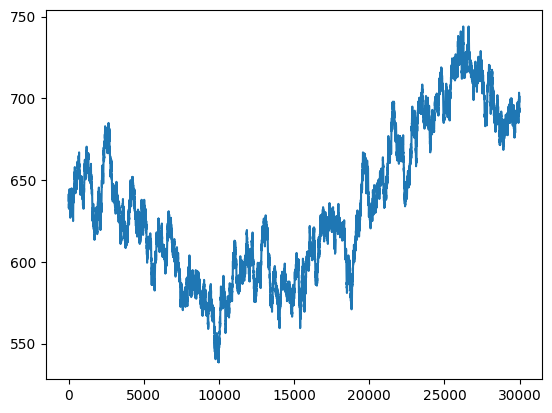

In [9]:
plt.plot(master["premium"])

In [10]:
master["returns"] = master["coconut"].pct_change()
print(master["returns"].std()*math.sqrt(10000)*math.sqrt(252))

0.16341156419413322


In [11]:
import statistics as stats
import math

def BS_call_calc(S_0, K, sig, tau, r=0):
    """
    Calculates: midprice of a order_depths object

    Parameters:
    - `S_0` - Current underlying price
    - `K` - Strike Price
    - `sig` - Annualized volatility of returns
    - `tau` - Time until maturity (in years)
    - `r` - Interest rate
    """

    d_plus = (math.log(S_0 / K) + (r + (1/2)*(math.pow(sig,2))*(tau))) / (sig*math.sqrt(tau))
    d_minus = (math.log(S_0 / K) + (r - (1/2)*(math.pow(sig,2))*(tau))) / (sig*math.sqrt(tau))
    return S_0 * stats.NormalDist().cdf(d_plus) - K * math.exp(-r*tau) * stats.NormalDist().cdf(d_minus)

def BS_vega_calc(S_0, K, sig, tau, r):
  d_plus = (math.log(S_0 / K) + (r + (1/2)*(math.pow(sig,2))*(tau))) / (sig*math.sqrt(tau))
  return S_0 * math.sqrt(tau) * stats.NormalDist().cdf(d_plus)

def BS_IV_calc(C_market, S_0, K, tau, r):
  MAX_ITER = 7
  epsilon = 0.00001
  iter = 0
  tau = tau/250 #converting tau to years for calculations

  m = S_0 / (K*math.exp(-r*tau))
  sig_n = math.sqrt((2*abs(math.log(m))) / tau+0.0001)  #sig_0
  C_BSM = BS_call_calc(S_0, K, sig_n, tau, r)

  while(abs(C_market-C_BSM) > epsilon and iter < MAX_ITER):
    C_BSM = BS_call_calc(S_0, K, sig_n, tau, r)
    vega_BSM = BS_vega_calc(S_0, K, sig_n, tau, r)
    sig_n = sig_n + ((C_market - C_BSM)  /  (vega_BSM+0.00001))

    iter+=1

  return sig_n


In [12]:
master["IV"] = master.apply(lambda x: BS_IV_calc(x['coco coupon'], x['coconut'], 10000, 250-x['timestamp']/(100*10000), 0), axis=1)

In [23]:
master["IV"].mean()

0.159596903642409

In [25]:
master["BSM_prices"] = master.apply(lambda x: BS_call_calc(x['coconut'], 10000, 0.159596903642409, (250-x['timestamp']/(100*10000))/252, 0), axis=1)

In [26]:
master["diffs"] = (master['coco coupon']- master["BSM_prices"])
master.head(4000)

,coconut,coco coupon,intrin,premium,timestamp,returns,IV,BSM_prices,diffs
0,10000.0,637.5,0.0,637.5,0.0,NaN,0.159960,633.500841,3.999159
1,9999.5,637.5,-0.5,638.0,100.0,-0.000050,0.160028,633.234908,4.265092
2,9998.5,637.5,-1.5,639.0,200.0,-0.000100,0.160162,632.703357,4.796643
3,9999.5,638.5,-0.5,639.0,300.0,0.000100,0.160279,633.234655,5.265345
4,9998.5,637.5,-1.5,639.0,400.0,-0.000100,0.160162,632.703104,4.796896
...,...,...,...,...,...,...,...,...,...
3995,10054.5,684.5,54.5,630.0,399500.0,0.000000,0.164521,662.341242,22.158758
3996,10054.0,684.5,54.0,630.5,399600.0,-0.000050,0.164589,662.068528,22.431472
3997,10053.0,683.5,53.0,630.5,399700.0,-0.000099,0.164475,661.523412,21.976588
3998,10052.0,681.5,52.0,629.5,399800.0,-0.000099,0.164110,660.978545,20.521455


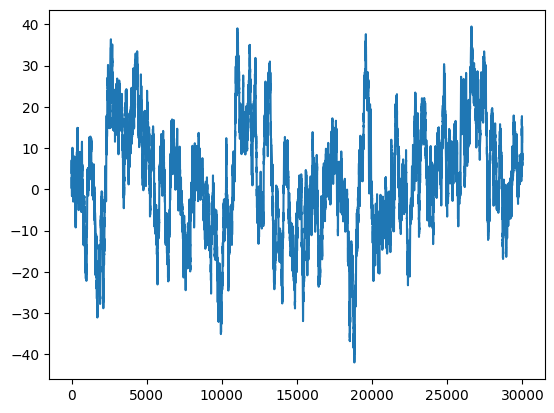

In [27]:
plt.plot(master["diffs"])
plt.show()

In [28]:
print((master['coco coupon']- master["BSM_prices"]).std())

13.499291898379804


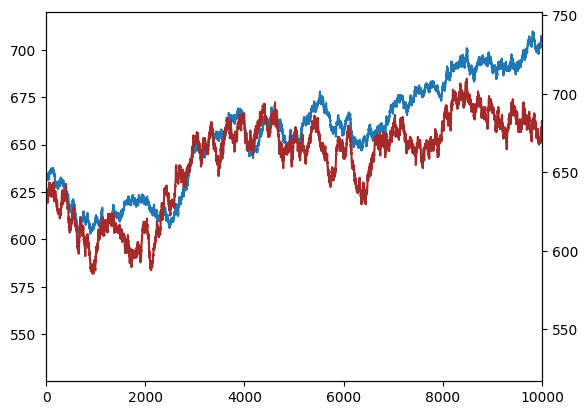

In [29]:
fix,ax1 = plt.subplots()
ax1.plot(master["BSM_prices"])
ax2 = ax1.twinx()
ax2.plot(master["coco coupon"], color = "brown")
plt.xlim(0,10000)
plt.show()

<Axes: xlabel='diffs', ylabel='Count'>

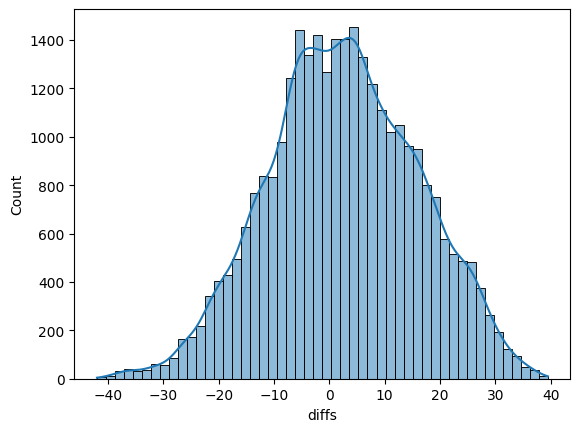

In [36]:
import seaborn as sns
sns.histplot(master["diffs"], bins=50,kde=True)
